# Exporting Unique Sequences
Notebook helps to export all unique RNA and protein sequences


## Protein Sequences

In [28]:
import pandas as pd
import os
import pickle
import math
import numpy as np
from pathlib import Path

In [29]:
# DB_PATH = "dataset/external_databases"
DB_PATH = "/work/dlclarge1/matusd-rpi/RPI/RNAProteinInteractions"
RESULTS_PATH = "dataset/results/"
Path(RESULTS_PATH).mkdir(parents=True, exist_ok=True)

In [30]:
print(DB_PATH)
seq_databases = [
    os.path.join(DB_PATH, 'NCBI/ncbi_proteins.parquet'),
    os.path.join(DB_PATH, 'UniProt/protein_UniProt.parquet'),
]
print(os.path.exists(seq_databases[0]))
print(os.path.exists(seq_databases[1]))
print(os.path.exists("/work/dlclarge1/matusd-rpi/RPI/RNAProteinInteractions/NCBI/ncbi_proteins.parquet"))

/work/dlclarge1/matusd-rpi/RPI/RNAProteinInteractions
True
False
True


In [31]:
seq_databases = [
    os.path.join(DB_PATH, 'NCBI/ncbi_proteins.parquet'),
    os.path.join(DB_PATH, 'UniProt/protein_uniprot.parquet'),
]
all_df = pd.DataFrame()
for db in seq_databases:
    temp_df = pd.read_parquet(db, engine='pyarrow')
    all_df = pd.concat([all_df, temp_df])
    del temp_df
print(f"Number of entries:\t\t{all_df.shape[0]:,}")
print(f"Number of unique sequences:\t{all_df['Sequence_2'].nunique():,}")
all_df = all_df.dropna(subset=['Sequence_2'])
all_df['Sequence_2_shuffle'] = False
all_df = all_df.drop_duplicates(subset=['Raw_ID2', 'Sequence_2'])
print(f"Number of entries after dropping duplicates based on Raw_ID2 & Sequence 2: {all_df.shape[0]:,}")
all_df.to_parquet(os.path.join(RESULTS_PATH, 'protein_sequences.parquet'), engine='pyarrow')

Number of entries:		287,226
Number of unique sequences:	166,473
Number of entries after dropping duplicates based on Raw_ID2 & Sequence 2: 167,227


In [32]:
all_df = pd.read_parquet(os.path.join(RESULTS_PATH, 'protein_sequences.parquet'), engine='pyarrow')
# store protein sequences shorter than 1024
all_df_short = all_df[all_df['Sequence_2_len'] <= 1024]
print(f"{all_df_short.shape[0]:,}/{all_df.shape[0]:,}")

all_df_short.to_parquet(os.path.join(RESULTS_PATH, 'protein_sequences_short.parquet'), engine='pyarrow')

133,069/167,227


In [33]:
all_df_short.head()

,Raw_ID2,Sequence_2_ID,Sequence_2,Sequence_2_len,Sequence_2_shuffle
0,NCBI:69865,1434110739,mesnhksgdglsgtqkeaalralvqrtgyslvqengqrkyggpppg...,587,False
1,NCBI:69865,1039758154,mrlmmdfngnnrgyafvtfsnkqeaknaikqlnnyeirtgrllgvc...,511,False
2,NCBI:69865,124487289,mesnhksgdglsgtqkeaalralvqrtgyslvqengqrkyggpppg...,595,False
3,NCBI:20927,2213207097,mplafcgtenhsaayrvdqgvlnngcfvdalnvvphvfllfitfpi...,551,False
5,NCBI:20927,2213206835,meyigacvvliaaatsisnslhrelsaglvglgltyalmvsnylnw...,331,False


## RNA Sequences

In [34]:
seq_databases = [
    os.path.join(DB_PATH, 'Ensembl/Ensembl.parquet'),
    os.path.join(DB_PATH, 'miRBase/miRNA.parquet'),
    os.path.join(DB_PATH, 'NCBI/ncbi_rna.parquet'),
    os.path.join(DB_PATH, 'NONCODE/NONCODE.parquet'),
]
all_df = pd.DataFrame()
for db in seq_databases:
    temp_df = pd.read_parquet(db, engine='pyarrow')
    all_df = pd.concat([all_df, temp_df])
    del temp_df
print(f"Number of entries:\t\t{all_df.shape[0]:,}")
print(f"Number of unique sequences:\t{all_df['Sequence_1'].nunique():,}")
all_df = all_df.dropna(subset=['Sequence_1'])
all_df = all_df.drop(['index'], axis=1)
all_df['Sequence_1_shuffle'] = False
all_df.to_parquet(os.path.join(RESULTS_PATH, 'rna_sequences.parquet'), engine='pyarrow')

Number of entries:		564,557
Number of unique sequences:	539,133


In [35]:
print(all_df.head())

                      Raw_ID1  \
0  Ensembl:ENSMUSG00000108652   
1  Ensembl:ENSMUSG00000086714   
2  Ensembl:ENSMUSG00000089755   
3  Ensembl:ENSMUSG00000046683   
4  Ensembl:ENSMUSG00000108236   

                                          Sequence_1  Sequence_1_len  \
0  AACAGAACAAAAAUGGAGAGAAGCAAAGACAGAGCCAUUAAAUAUC...           34996   
1  ACAGGAUUCUUCAAUCCAGAUCCCCGGGGAGAAUCAGUCUUGAAAA...           13695   
2  GACAUUUCUGCACCAAGCACACAGCUUGUGGGUGCCUCAUAGCCUC...            2224   
3  GGAGAGGGAAUUGGCAGGUUCAGCGGGAGGCUACUCCCCCACCUGU...           10394   
4  GCAUCGGGCUCUGCUCUGGGACUUAGCAGGAAAGGUGCGCAUUCAG...            1254   

        Sequence_1_ID  Sequence_1_shuffle  
0  ENSMUSG00000108652               False  
1  ENSMUSG00000086714               False  
2  ENSMUSG00000089755               False  
3  ENSMUSG00000046683               False  
4  ENSMUSG00000108236               False  


In [36]:
max_value = all_df['Sequence_1_len'].max()
min_value = all_df['Sequence_1_len'].min()
median = all_df['Sequence_1_len'].median()
quantile_90 = all_df['Sequence_1_len'].quantile(0.9)


print(min_value, max_value, median, quantile_90)

18 1338345 2710.0 7647.0


158356 158356.0
324678 166322.0
424466 99788.0
481859 57393.0
513996 32137.0


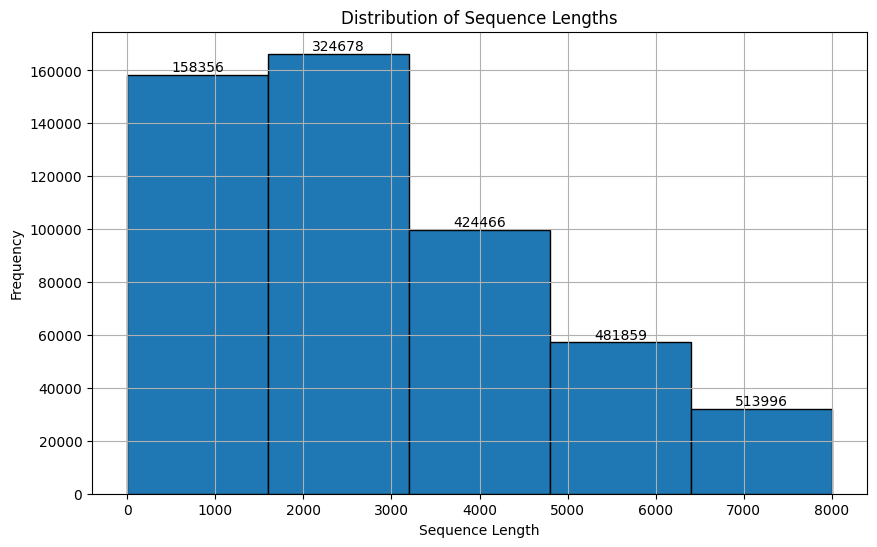

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt


# Calculate the 90th percentile for the sequence length column
quantile_90 = all_df['Sequence_1_len'].quantile(0.90)

# Determine the range to ceil the 90th quantile to the nearest thousand
upper_range = math.ceil(quantile_90 / 1000) * 1000

# Create histogram and capture the bin counts
plt.figure(figsize=(10, 6))
values, bins, patches = plt.hist(all_df['Sequence_1_len'], bins=5, range=[0, upper_range], edgecolor='black')
c_val = 0
# Annotate each bar with the count of sequences
for i in range(len(values)):
    # Calculate the center of each bin
    bin_center = (bins[i] + bins[i+1]) / 2
    c_val = c_val + int(values[i])
    print(c_val, values[i])
    # Annotate the bar with the count above it
    plt.text(bin_center, values[i], str(c_val), ha='center', va='bottom')

plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.grid(True)
plt.show()


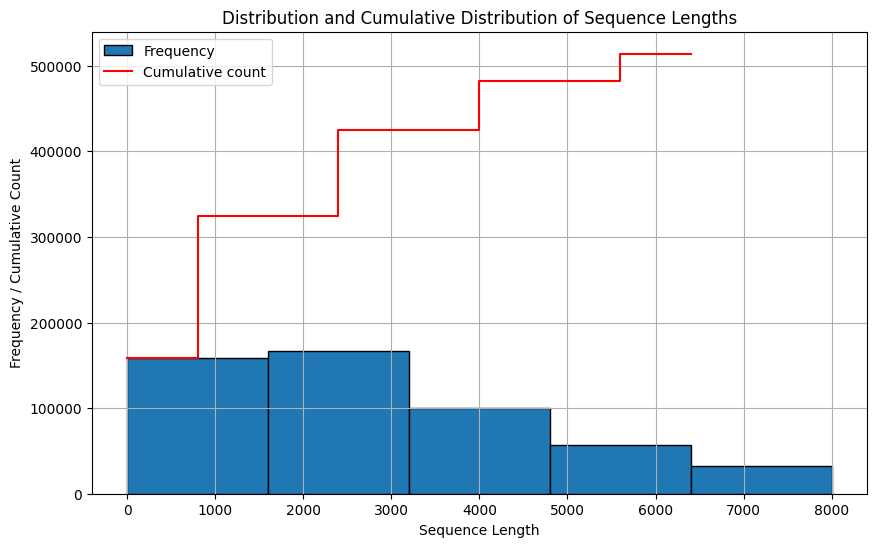

In [24]:
# Create histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(all_df['Sequence_1_len'], bins=5, range=[0, math.ceil(quantile_90 / 1000) * 1000], edgecolor='black', label='Frequency')

# Calculate the cumulative counts
cumulative_counts = np.cumsum(n)

# Plot the cumulative counts using the step function for a stairstep-like plot
plt.step(bins[:-1], cumulative_counts, where='mid', color='red', label='Cumulative count')

# Add labels, title, and legend
plt.xlabel('Sequence Length')
plt.ylabel('Frequency / Cumulative Count')
plt.title('Distribution and Cumulative Distribution of Sequence Lengths')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [40]:
# store rna sequences shorter than 150 bps

all_df_short = all_df[all_df['Sequence_1_len'] <= 150]
print(f"{all_df_short.shape[0]:,}/{all_df.shape[0]:,}")
all_df_short.to_parquet(os.path.join(RESULTS_PATH, 'rna_sequences_short.parquet'), engine='pyarrow')

11,290/564,557


In [41]:
# Store fasta file of all unique RNA sequences (specific for RNA-FM)
all_df = all_df.sort_values(by=['Sequence_1_len'])
all_df = all_df.dropna(subset=['Sequence_1'])
print(f"Number of sequences: {all_df.shape[0]}")
# Filter out sequences which are longer than 10000 BPs
# typo here?
# all_df = all_df[all_df['Sequence_1_len'] <= 1024]
all_df = all_df[all_df['Sequence_1_len'] <= 150]
# rna_sequences = [SeqIO.SeqRecord(Seq(seq['Sequence_1']), id=seq['Raw_ID1'], description="") for idx, seq in all_df.iterrows()]
rna_sequences = [(seq['Raw_ID1'], seq['Sequence_1']) for _, seq in all_df.iterrows()]
print(len(rna_sequences))
with open('unique_rna_sequences.pickle', 'wb') as file:
    pickle.dump(rna_sequences, file)

Number of sequences: 564557
11290
